In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from data_pipeline.data_package import DataPackage
import json
from data_pipeline.data_loading_utils import data_packages_to_datasets

In [171]:
conditions = {
    "Age-related Macular Degeneration": "ARMD",
    "Best Disease": "Best",
    "Bietti crystalline dystrophy": "BCD",
    "Cataract": "Cataract",
    "Cone Dystrophy or Cone-rod Dystrophy": "CD/CRD",
    "Diabetic Retinopathy": "DR",
    "Glaucoma": "Glaucoma",
    "Maculopathy": "Maculopathy",
    "Myopia": "Myopia",
    "Normal": "Normal",
    "Retinitis Pigmentosa": "RP",
    "Stargardt Disease": "Stargardt",
    "Macular dystrophy": "MD",
    "Pseudoxanthoma elasticum": "PXE",
    "Retinal Dystrophy": "Retinal Dystrophy",  # No abbreviation provided, using full name
    "Optic atrophy": "Optic atrophy",
    "Usher-Syndrom": "Usher",
    "Drusen": "Drusen",
    "Leber Hereditary Optic Neuropathy": "LHNO",
    "Choroideremia": "Choroideremia",
    "Sorsby Fundus Dystrophy": "SFD"
}

#convert all the keys to lower case
conditions = {k.lower(): v for k, v in conditions.items()}

key_mapper = lambda x: conditions[x.lower()]

In [172]:
#load the data
dataset_path = 'datasets/2024-06-05_16-22-01'
train_dataset_path = f'{dataset_path}/train'
val_dataset_path = f'{dataset_path}/val'
test_dataset_path = f'{dataset_path}/test'

#get all the files in the train dataset
train_data_files = os.listdir(train_dataset_path)
val_data_files = os.listdir(val_dataset_path)
test_data_files = os.listdir(test_dataset_path)

#create a list of paths to the data files
train_data_paths = [f'{train_dataset_path}/{file}' for file in train_data_files]
val_data_paths = [f'{val_dataset_path}/{file}' for file in val_data_files]
test_data_paths = [f'{test_dataset_path}/{file}' for file in test_data_files]
#load the data
train_packages = [DataPackage.load(path) for path in train_data_paths]
val_packages = [DataPackage.load(path) for path in val_data_paths]
test_packages = [DataPackage.load(path) for path in test_data_paths]



In [173]:
#load the dataset configuration
with open(f'{dataset_path}/dataset_config.json', 'r') as file:
    dataset_config = json.load(file)
label_names = dataset_config['labels_to_encode']

In [174]:
#get all the labels for each split
train_labels = []
for package in train_packages:
    train_labels.extend(package.get_labels())
val_labels = []
for package in val_packages:
    val_labels.extend(package.get_labels())
test_labels = []
for package in test_packages:
    test_labels.extend(package.get_labels())

#create a list with the data sources
train_data_sources = []
for package in train_packages:
    train_data_sources.extend([package.data_source_name] * len(package.get_labels()))
val_data_sources = []
for package in val_packages:
    val_data_sources.extend([package.data_source_name] * len(package.get_labels()))
test_data_sources = []
for package in test_packages:
    test_data_sources.extend([package.data_source_name] * len(package.get_labels()))


In [175]:
#convert to a dataframe which has label_name as the column name
train_df = pd.DataFrame(train_labels, columns=label_names)
val_df = pd.DataFrame(val_labels, columns=label_names)
test_df = pd.DataFrame(test_labels, columns=label_names)

#map the column names to the conditions
train_columns=[key_mapper(col) for col in train_df.columns]
val_columns=[key_mapper(col) for col in val_df.columns]
test_columns=[key_mapper(col) for col in test_df.columns]
train_df.columns = train_columns
val_df.columns = val_columns
test_df.columns = test_columns
#add the data source column
train_df['data_source'] = train_data_sources
val_df['data_source'] = val_data_sources
test_df['data_source'] = test_data_sources

#in the data source column, replace the SES with BAU and UKB with UKBonn
train_df['data_source'] = train_df['data_source'].replace('SES', 'BAU')
train_df['data_source'] = train_df['data_source'].replace('UKB', 'UKBonn')
val_df['data_source'] = val_df['data_source'].replace('SES', 'BAU')
val_df['data_source'] = val_df['data_source'].replace('UKB', 'UKBonn')
test_df['data_source'] = test_df['data_source'].replace('SES', 'BAU')
test_df['data_source'] = test_df['data_source'].replace('UKB', 'UKBonn')

#make every Column start with a capital letter
train_df.columns = [col.capitalize()[0] + col[1:] for col in train_df.columns]
val_df.columns = [col.capitalize()[0] + col[1:] for col in val_df.columns]
test_df.columns = [col.capitalize()[0] + col[1:] for col in test_df.columns]

#sort the columns alphabetically
train_df = train_df.reindex(sorted(train_df.columns), axis=1)
val_df = val_df.reindex(sorted(val_df.columns), axis=1)
test_df = test_df.reindex(sorted(test_df.columns), axis=1)

In [176]:
train_df.head()

,ARMD,BCD,Best,CD/CRD,Cataract,Choroideremia,DR,Data_source,Drusen,Glaucoma,...,Maculopathy,Myopia,Normal,Optic atrophy,PXE,RP,Retinal Dystrophy,SFD,Stargardt,Usher
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ODIR-5K,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ODIR-5K,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ODIR-5K,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ODIR-5K,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,ODIR-5K,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [177]:
import scienceplots

plt.style.use(['science', 'no-latex'])
def stacked_bar_chart(df, dataset_name):
    # Aggregating data sources per label
    label_columns = [col for col in df.columns if not col.startswith('Data_source')]
    df_melted = df.melt(id_vars=['Data_source'], value_vars=label_columns, var_name='label', value_name='count')
    df_melted = df_melted[df_melted['count'] == 1]

    # Pivot table to get counts
    counts = df_melted.pivot_table(index='label', columns='Data_source', aggfunc='size', fill_value=0)

    # Calculate percentages
    percentages = counts.div(counts.sum(axis=1), axis=0)

    # Plotting
    fig, ax = plt.subplots(figsize=(4.8 / 2 *0.98, 4.8 / 2 *0.98 - 0.5))

    bar_width = 0.85  # Increase bar width
    bottom = pd.Series([0] * counts.shape[0], index=counts.index)
    # Annotating total height of each bar
    total_heights = counts.sum(axis=1)
    # Calculate a base font size based on the figure size and number of bars
    for source in counts.columns:
        ax.bar(counts.index, counts[source], width=bar_width, bottom=bottom, label=source)

        # Annotating the percentages
        for i, (label, value) in enumerate(counts[source].items()):
            percentage = percentages.loc[label, source]
            if total_heights[i] * percentage  >= 0.10 * total_heights.max() and percentage > 0.10:
                ax.text(i, bottom[label] + value / 2, f'{percentage:.2f}', ha='center', va='center', color='black', fontsize=6, rotation=90)
        
        bottom += counts[source]


    for i, (label, total) in enumerate(total_heights.items()):
        ax.text(i, total + 1, f'{total}', ha='center', va='bottom', fontweight='bold', fontsize=6, rotation=90)

    
    #ax.legend(title='Data Sources', fontsize = 5, title_fontsize = 5, loc='best')
    #turn off the grid
    ax.spines[['right', 'top', 'left']].set_visible(False)
    #also remove the ticks
    ax.tick_params(axis='both', which='both', length=0)
    plt.xticks(rotation=90, fontsize=5)
    #remove the y values
    ax.set_yticks([])


plots_path = f'{dataset_path}/plots'
os.makedirs(f'{plots_path}', exist_ok=True)
train_df_no_aug_title = 'train dataset (before augmentation)'
stacked_bar_chart(train_df, train_df_no_aug_title)
plt.savefig(f'{plots_path}/label_distribution_train_no_aug.pdf')
plt.close()
val_df_title = 'validation dataset'
stacked_bar_chart(val_df, val_df_title)
plt.savefig(f'{plots_path}/label_distribution_val.pdf')
plt.close()
test_df_title = 'test dataset'
stacked_bar_chart(test_df, test_df_title)
plt.savefig(f'{plots_path}/label_distribution_test.pdf')
plt.close()

/tmp/ipykernel_90703/2660893577.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if total_heights[i] * percentage  >= 0.10 * total_heights.max() and percentage > 0.10:
/tmp/ipykernel_90703/2660893577.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if total_heights[i] * percentage  >= 0.10 * total_heights.max() and percentage > 0.10:
/tmp/ipykernel_90703/2660893577.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if tota

In [178]:
#convert the datapackages to datasets
train_datasets = data_packages_to_datasets(package_list=train_packages, file_readers=[None] *len(train_packages), transforms=[None] *len(train_packages))
data_source_list = [package.data_source_name for package in train_packages]

for dataset in train_datasets:
    dataset.balance_augmentation()

#convert them back to datapackages
augmented_train_packages = []
augmented_sources = []
for i, dataset in enumerate(train_datasets):
    labels = dataset.labels
    file_paths = dataset.file_paths
    data_source = data_source_list[i]
    augmented_sources.extend([data_source] * len(labels))
    augmented_train_packages.append(DataPackage(data=dataset.file_paths, labels=labels, data_source_name=data_source))

#convert to a dataframe which has label_name as the column name
augmented_train_labels = []
for package in augmented_train_packages:
    augmented_train_labels.extend(package.get_labels())

#convert to a dataframe which has label_name as the column name
augmented_train_df = pd.DataFrame(augmented_train_labels, columns=label_names)
augmented_train_columns=[key_mapper(col) for col in augmented_train_df.columns]
augmented_train_df.columns = augmented_train_columns
#add the data source column
augmented_train_df['data_source'] = augmented_sources
#in the data source column, replace the SES with BAU and UKB with UKBonn
augmented_train_df['data_source'] = augmented_train_df['data_source'].replace('SES', 'BAU')
augmented_train_df['data_source'] = augmented_train_df['data_source'].replace('UKB', 'UKBonn')
#make every Column start with a capital letter

augmented_train_df.columns = [col.capitalize()[0] + col[1:] for col in augmented_train_df.columns]
#sort the columns alphabetically
augmented_train_df = augmented_train_df.reindex(sorted(augmented_train_df.columns), axis=1)
train_df_with_aug_title = 'train dataset (after augmentation)'
stacked_bar_chart(augmented_train_df, train_df_with_aug_title)
plt.savefig(f'{plots_path}/label_distribution_train_with_aug.pdf')
plt.close()




/tmp/ipykernel_90703/2660893577.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if total_heights[i] * percentage  >= 0.10 * total_heights.max() and percentage > 0.10:
/tmp/ipykernel_90703/2660893577.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if total_heights[i] * percentage  >= 0.10 * total_heights.max() and percentage > 0.10:
/tmp/ipykernel_90703/2660893577.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if tota

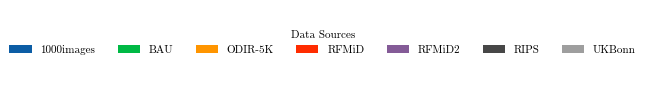

In [179]:
# create an empty legend plot
fig, ax = plt.subplots(figsize=(4.8 *0.98, 2 / 2 *0.98))
ax.axis('off')
#get all the unique data sources
unique_data_sources = train_df['Data_source'].unique()
#sort them alphabetically
unique_data_sources = np.sort(unique_data_sources)
for i, source in enumerate(unique_data_sources):
    ax.bar(0, 0, label=source,)
ax.legend(title='Data Sources', fontsize = 8, title_fontsize = 8, loc='center', ncols=len(unique_data_sources))
plt.savefig(f'{plots_path}/legend.pdf')
plt.show()